<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Curva_de_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import curve_fit

# Dados das falhas das peças A, B e C
falhas_A = np.array([66])
falhas_B = np.array([59])
falhas_C = np.array([51])

# Função de distribuição de Weibull
def weibull_func(x, c, loc, scale):
    return weibull_min.pdf(x, c, loc=loc, scale=scale)

# Ajustar os dados à distribuições de Weibull
parametros_A, _ = curve_fit(weibull_func, falhas_A, np.linspace(0, 100, len(falhas_A)))
parametros_B, _ = curve_fit(weibull_func, falhas_B, np.linspace(0, 100, len(falhas_B)))
parametros_C, _ = curve_fit(weibull_func, falhas_C, np.linspace(0, 100, len(falhas_C)))

# Gerar pontos para a curva de Weibull
x = np.linspace(0, 100, 100)
y_A = weibull_func(x, *parametros_A)
y_B = weibull_func(x, *parametros_B)
y_C = weibull_func(x, *parametros_C)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(x, y_A, label='Peça A')
plt.plot(x, y_B, label='Peça B')
plt.plot(x, y_C, label='Peça C')
plt.xlabel('Falhas')
plt.ylabel('Probabilidade acumulada')
plt.title('Curva de Weibull para análise de falhas das peças A, B e C')
plt.legend()
plt.grid(True)
plt.show()




TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

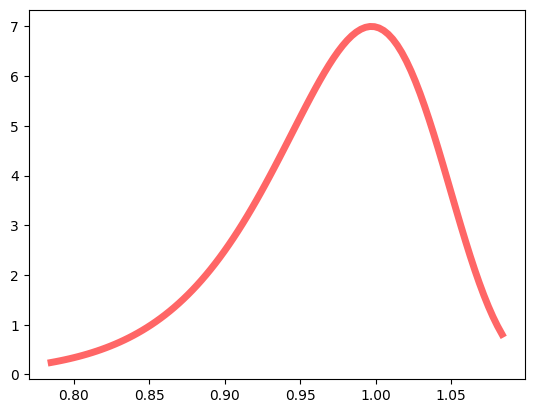

In [25]:
c=19
x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), 100)

plt.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

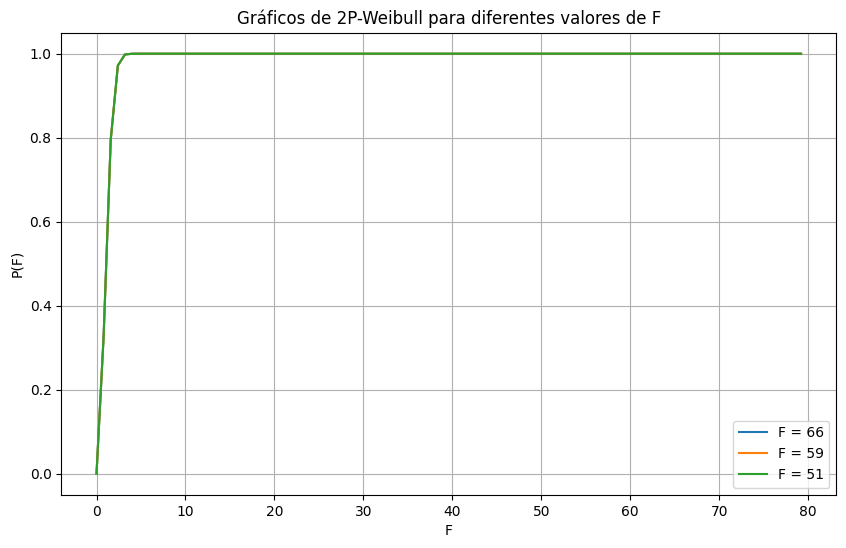

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de F (falhas)
F_values = [66, 59, 51]

# Parâmetros de forma (gamma) e escala (beta) para cada valor de F
gamma_values = [2,2,2]  # Valor de exemplo, você pode ajustar conforme necessário
beta_values = [1.27, 1.27, 1.27]  # Valor de exemplo, você pode ajustar conforme necessário

# Faixa de valores de F para o gráfico
F_range = np.linspace(0, max(F_values) * 1.2, 100)

# Função de distribuição acumulada da Weibull inversa
def weibull_inverse(F, gamma, beta):
    return 1 - np.exp(- (F / beta) ** gamma)

# Plotar os gráficos de 2P-Weibull
plt.figure(figsize=(10, 6))
for i, F in enumerate(F_values):
    plt.plot(F_range, weibull_inverse(F_range, gamma_values[i], beta_values[i]), label=f'F = {F}')
plt.xlabel('F')
plt.ylabel('P(F)')
plt.title('Gráficos de 2P-Weibull para diferentes valores de F')
plt.legend()
plt.grid(True)
plt.show()


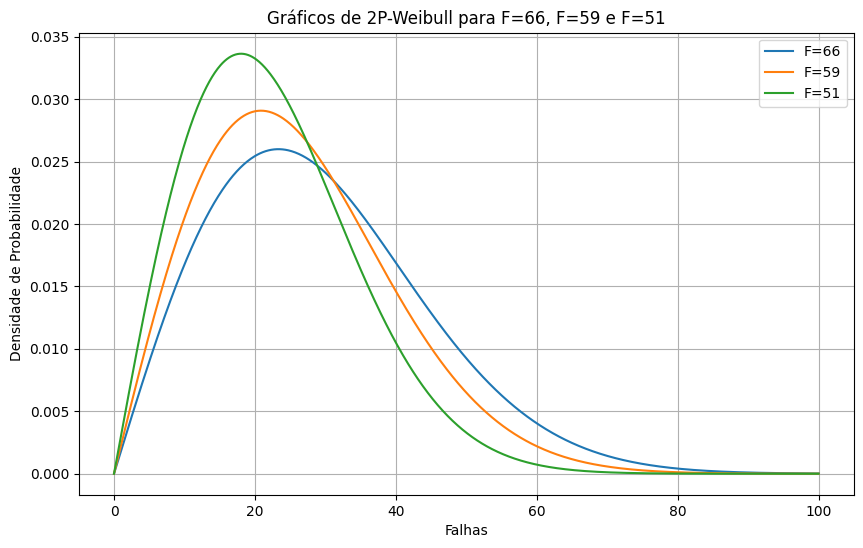

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetros da distribuição de Weibull para F=66, F=59 e F=51
c = 2  # Parâmetro de forma comum a todas as distribuições
f_A = 66
f_B = 59
f_C = 51

# Gerar valores para x
x = np.linspace(0, 100, 1000)

# Calcular a função de densidade de probabilidade (PDF) para cada valor de F
pdf_A = weibull_min.pdf(x, c, scale=f_A/c)
pdf_B = weibull_min.pdf(x, c, scale=f_B/c)
pdf_C = weibull_min.pdf(x, c, scale=f_C/c)

# Plotar os gráficos
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_A, label='F=66')
plt.plot(x, pdf_B, label='F=59')
plt.plot(x, pdf_C, label='F=51')
plt.xlabel('Falhas')
plt.ylabel('Densidade de Probabilidade')
plt.title('Gráficos de 2P-Weibull para F=66, F=59 e F=51')
plt.legend()
plt.grid(True)
plt.show()


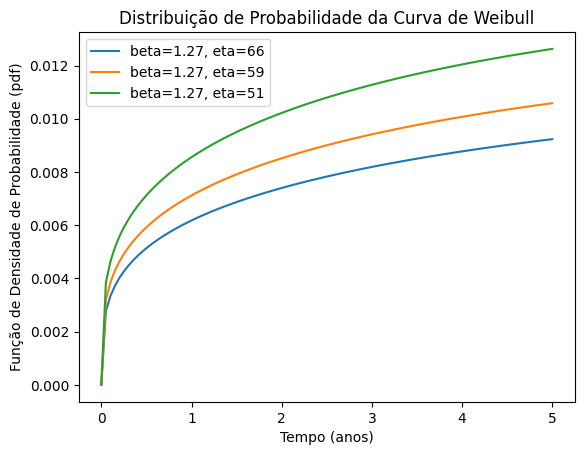

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Valores de forma (beta) e escala (eta) da distribuição de Weibull
beta_values = [1.27]  # Valores de forma
eta_values =  [66, 59, 51]  # Valores de escala

# Tempo (em anos)
time = np.linspace(0, 5, 100)

# Plotar os gráficos da distribuição de probabilidade da curva de Weibull para cada combinação de beta e eta
for beta in beta_values:
    for eta in eta_values:
        # Calcula a função de densidade de probabilidade (pdf) da distribuição de Weibull
        pdf = weibull_min.pdf(time, beta, scale=eta)

        # Plotar a função de densidade de probabilidade
        plt.plot(time, pdf, label=f'beta={beta}, eta={eta}')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Tempo (anos)')
plt.ylabel('Função de Densidade de Probabilidade (pdf)')
plt.title('Distribuição de Probabilidade da Curva de Weibull')
plt.legend()
plt.show()
